In [18]:
#Data Source
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.describe()

c:\users\530222\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
#Feature selection
df_sev = df_sev.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])


In [5]:
#clean the data
df_sev['ADDRTYPE'].fillna('Other',inplace=True)
df_sev['JUNCTIONTYPE'].fillna('Other',inplace=True)
df_sev['WEATHER'].fillna('Other',inplace=True)
df_sev['LIGHTCOND'].fillna('Other',inplace=True)
df_sev['ROADCOND'].fillna('Other',inplace=True)
df_sev.isnull().sum()

SEVERITYCODE    0
ADDRTYPE        0
JUNCTIONTYPE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

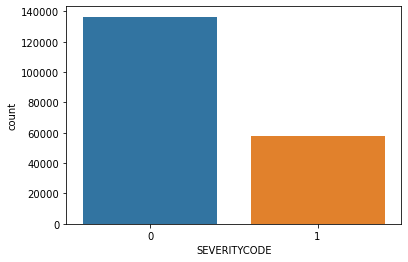

In [13]:
# to check the predictor values
df_sev["SEVERITYCODE"].value_counts()
sns.countplot(df_sev['SEVERITYCODE'],data=df_sev)

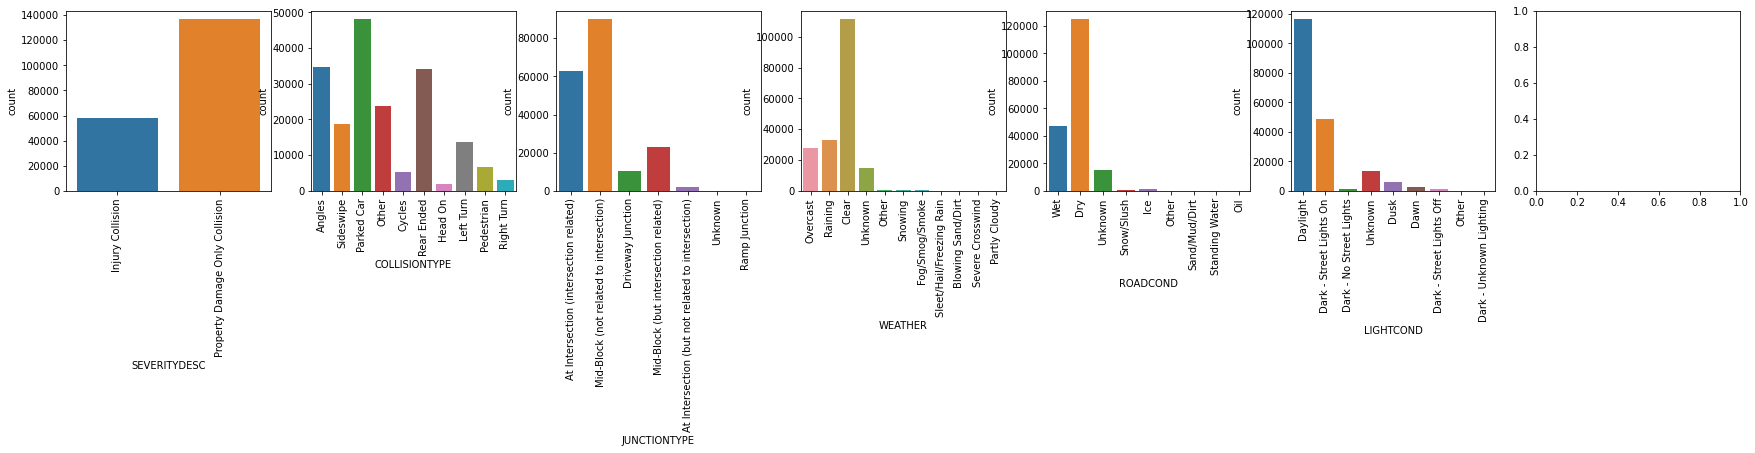

In [33]:
#Convert categorical variables to numeric values
severity =preprocessing.LabelEncoder()
severity.fit(df_sev['SEVERITYCODE'])
df_sev['SEVERITYCODE']=severity.transform(df_sev['SEVERITYCODE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['ADDRTYPE'])
df_sev['ADDRTYPE']=addrtype.transform(df_sev['ADDRTYPE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['JUNCTIONTYPE'])
df_sev['JUNCTIONTYPE']=addrtype.transform(df_sev['JUNCTIONTYPE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['WEATHER'])
df_sev['WEATHER']=addrtype.transform(df_sev['WEATHER'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['ROADCOND'])
df_sev['ROADCOND']=addrtype.transform(df_sev['ROADCOND'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['LIGHTCOND'])
df_sev['LIGHTCOND']=addrtype.transform(df_sev['LIGHTCOND'])

#df_sev.head(5)
df_sev.corr()
#variables analysis

fig,ax=plt.subplots(1,7,figsize=(30,5))
for variable,subplot in zip(categorical,ax.flatten()):
   sns.countplot(df[variable],ax=subplot)
   plt.subplots_adjust(bottom=0.3,top=0.8)
   for label in subplot.get_xticklabels():
      label.set_rotation(90)

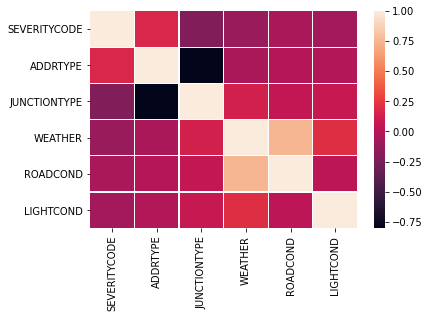

In [10]:
#Show heatmap between features
sns.heatmap(df_sev.corr(),linewidth=0.2,cbar_kws={"shrink":1})

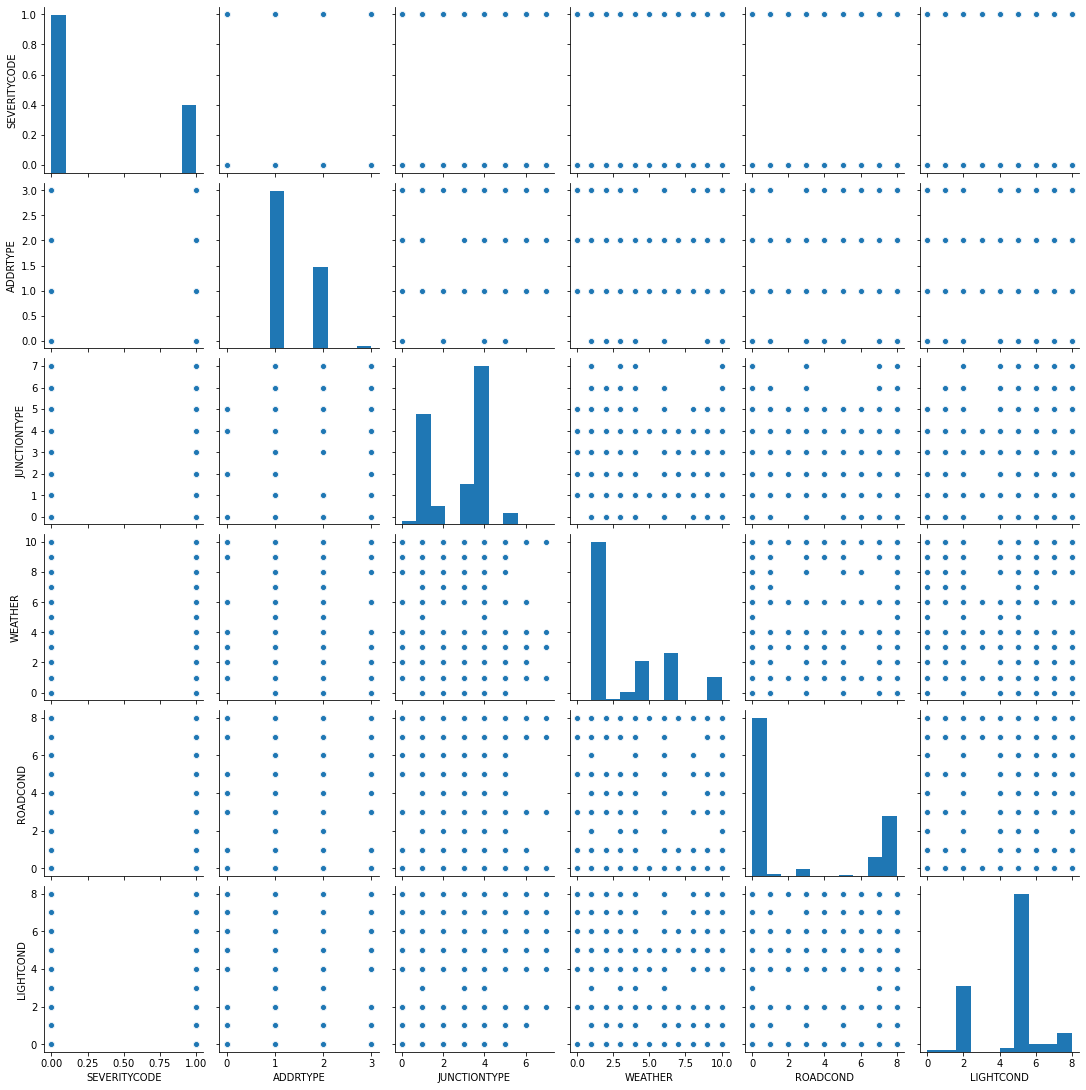

In [14]:
#pairplot on numerical features
sns.pairplot(df_sev)

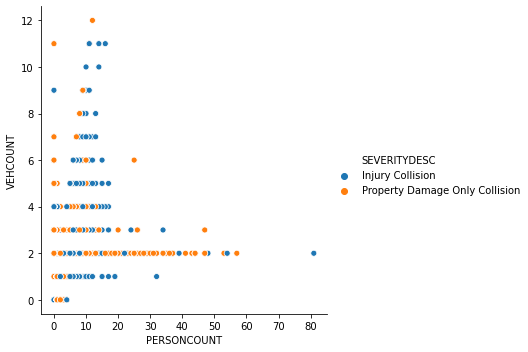

In [19]:
#Relplot
sns.relplot(x='PERSONCOUNT',y='VEHCOUNT',hue='SEVERITYDESC',data=df)

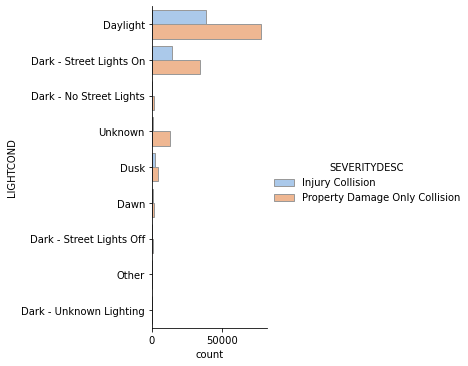

In [20]:
#Lightcondition with Severity
sns.catplot(y='LIGHTCOND',hue='SEVERITYDESC',kind='count',palette='pastel',
edgecolor='0.6',data=df)

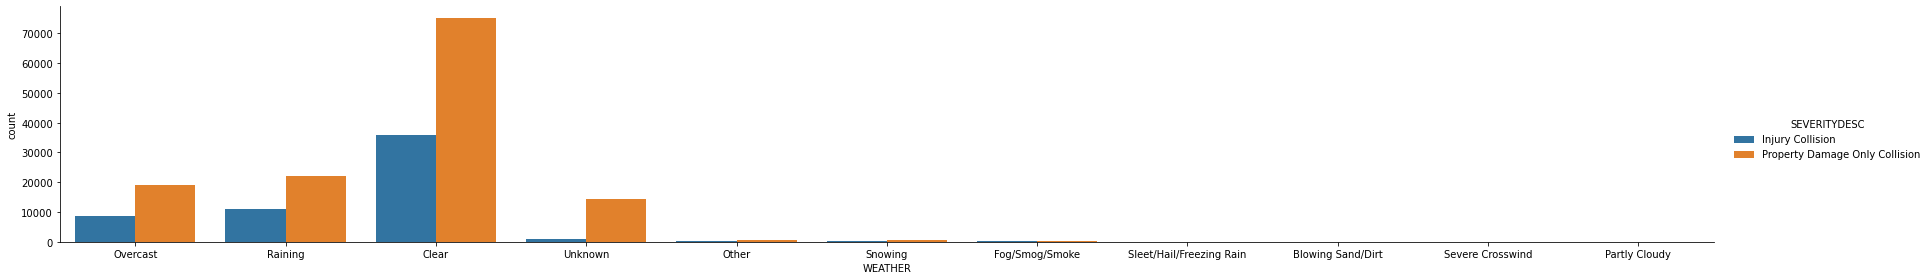

In [21]:
#Relationship between weather with Severity
sns.catplot(x='WEATHER',kind='count',hue='SEVERITYDESC',data=df,height=4,aspect=6)

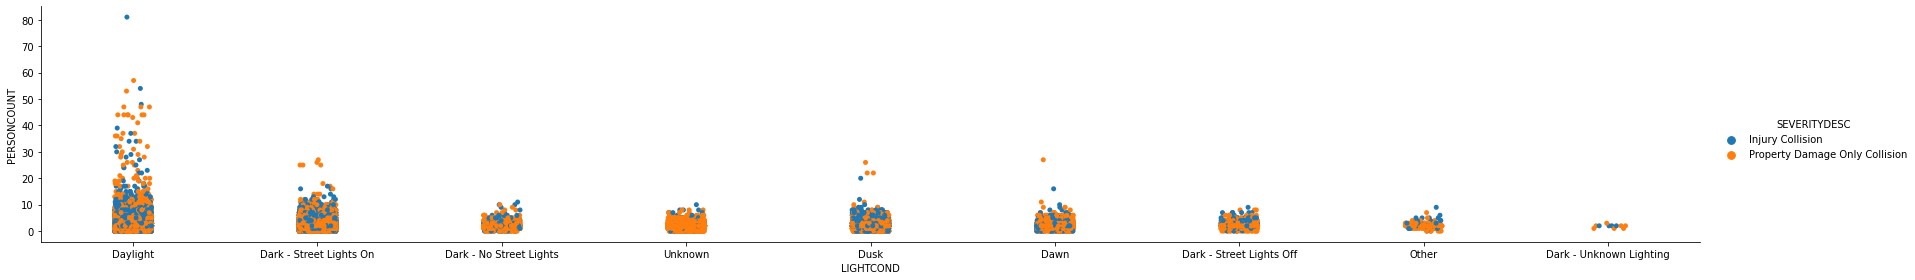

In [25]:
#Relationship between LIGHTCOND, PERSONCOUNT by SEVERITY of accidents
sns.catplot(x='LIGHTCOND',y='PERSONCOUNT',hue='SEVERITYDESC',data=df,height=4,aspect=6)

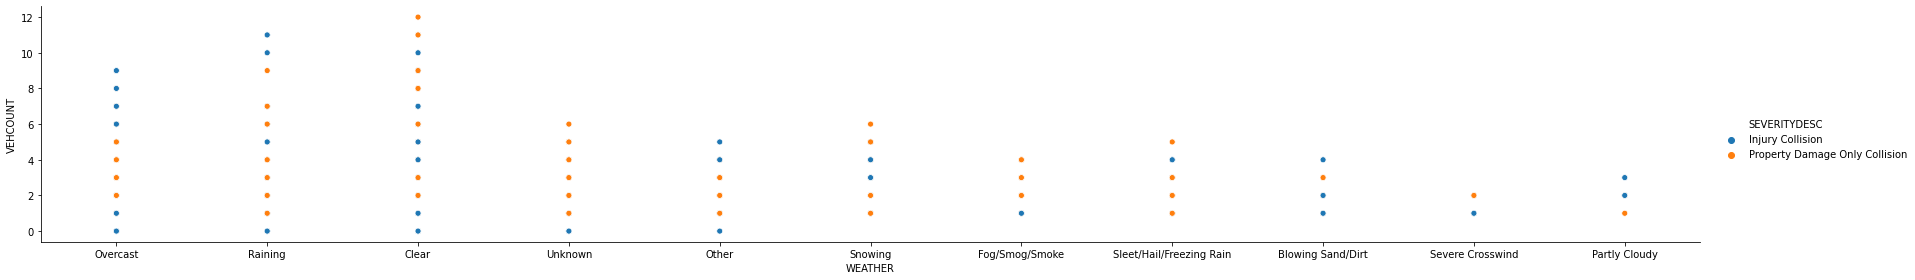

In [27]:
#Relationship between WEATHER, VEHCOUNT by SEVERITY of accidents
sns.relplot(x='WEATHER',y='VEHCOUNT',hue='SEVERITYDESC',data=df,height=4,aspect=6)


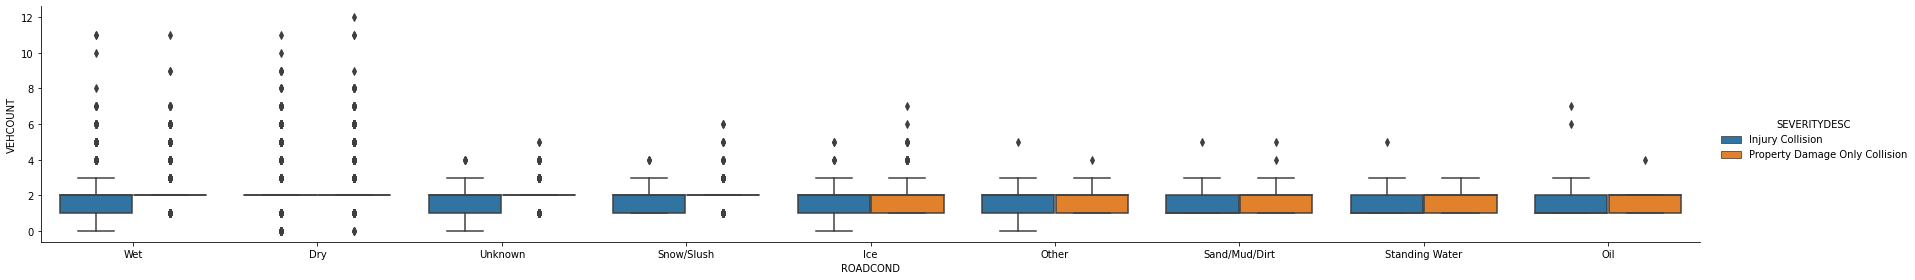

In [28]:
#Relationship between ROADCOND, VEHCOUNT by SEVRITY of accidents
sns.catplot(x='ROADCOND',y='VEHCOUNT',kind='box',hue='SEVERITYDESC',data=df,height=4,aspect=6)

In [29]:
#Data preparation for predictive modeling
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
X = df_sev.drop('SEVERITYCODE', axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
y=np.asarray(df_sev['SEVERITYCODE'])
y[0:5]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (136271, 5) (136271,)
Test set: (58402, 5) (58402,)


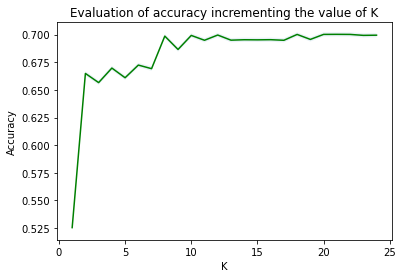

In [31]:
# KNN Model
Ks=25
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[]
for n in range(1,Ks):
   neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)
plt.show()

In [36]:
#Summary on KNN
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
Kyhat=neigh.predict(X_test)
KNN_jacc=jaccard_score(y_test,Kyhat,average='macro')
KNN_f1=f1_score(y_test,Kyhat,average='macro')
KNN_acc=accuracy_score(y_test,Kyhat)
print("KNN_jacc=",KNN_jacc,"KNN_f1=",KNN_f1,"KNN_acc=",KNN_acc)

KNN_jacc= 0.37191246702069936 KNN_f1= 0.45670261566621373 KNN_acc= 0.6995137152837232


In [37]:
print("The best accuracy was with", mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.7002842368412041 with k= 21


In [38]:
# Decision Tree
X_train_train,X_train_test,y_train_train,y_train_test = \
               train_test_split(X_train,y_train,test_size=0.2,random_state=0)
print('part Train set:',X_train_train.shape,y_train_train.shape)
print('part Test set:',X_train_test.shape,y_train_test.shape)

part Train set: (109016, 5) (109016,)
part Test set: (27255, 5) (27255,)


In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

depth=21
mean_acc1=np.zeros(depth - 4)
for n in range(4,depth):
   tree=DecisionTreeClassifier(criterion='entropy',max_depth=depth).fit(X_train_train,y_train_train)
   yhat=tree.predict(X_train_test)
   mean_acc1[n-4]=metrics.accuracy_score(y_train_test,yhat)

print("The mean accuracy array is:",mean_acc1)
print("\nThe maximum mean accuracy value is:",mean_acc1.max())

max_depth=list(mean_acc1).index(mean_acc1.max())+4
print("\nThe best model is the model with max_depth=",max_depth)

The mean accuracy array is: [0.69645937 0.69645937 0.69642267 0.69645937 0.69645937 0.69649606
 0.69638598 0.69638598 0.69642267 0.69645937 0.69642267 0.69642267
 0.69638598 0.69642267 0.69645937 0.69649606 0.69645937]

The maximum mean accuracy value is: 0.6964960557695835

The best model is the model with max_depth= 9


In [40]:
#Summary on Decision Tree

Dyhat=tree.predict(X_test)
DT_jacc=jaccard_score(y_test,Dyhat,average='macro')
DT_f1=f1_score(y_test,Dyhat,average='macro')
DT_acc=accuracy_score(y_test,Dyhat)

print('DT_jacc=',DT_jacc,"DT_f1=",DT_f1,"DT_acc=",DT_acc)

DT_jacc= 0.35397434583212195 DT_f1= 0.4182988472927632 DT_acc= 0.7026300469162015


In [41]:
severityTree=DecisionTreeClassifier(criterion='entropy',max_depth=max_depth).fit(X_train,y_train)
severityTree

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [42]:
#Logistic Regression
X_train_part=pd.DataFrame(X_train).sample(n=1000,random_state=0)
y_train_part=pd.DataFrame(y_train).sample(n=1000,random_state=0)

X_train_part_train,X_train_part_test,y_train_part_train,y_train_part_test=\
                   train_test_split(X_train_part,y_train_part,test_size=0.2,random_state=42)
print('Part Train Set:',X_train_part_train.shape,y_train_part_train.shape)
print('Part Test Set:',X_train_part_test.shape,y_train_part_test.shape)

Part Train Set: (800, 5) (800, 1)
Part Test Set: (200, 5) (200, 1)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
solvers=['newton-cg','lbfgs','liblinear','sag','saga']
mean_acc2=np.zeros((len(solvers)))

for i in range(len(solvers)):
   LR=LogisticRegression(C=0.01,solver=solvers[i]).fit(X_train_part_train,np.ravel(y_train_part_train))
   yhat=LR.predict(X_train_part_test)
   mean_acc2[i]=metrics.accuracy_score(y_train_part_test,yhat)
print("mean accuracy array:",mean_acc2)
print("\nmaximum mean accuracy value:",mean_acc2.max())

mean accuracy array: [0.685 0.685 0.67  0.685 0.685]

maximum mean accuracy value: 0.685


In [45]:
#Summary on Logistic Regression 
LRyhat=LR.predict(X_test)
LR_jacc=jaccard_score(y_test,LRyhat,average='macro')
LR_f1=f1_score(y_test,LRyhat,average='macro')
LR_acc=accuracy_score(y_test,LRyhat)
print("LR_jacc=",LR_jacc,"LR_f1=",LR_f1,"LR_acc=",LR_acc)
#log_loss
yhat_prob = LR.predict_proba(X_test)
LR_logloss=log_loss(y_test, yhat_prob)
print("Log_loss=",LR_logloss)

LR_jacc= 0.3527524426776879 LR_f1= 0.4154650876236762 LR_acc= 0.702989623643026
Log_loss= 0.5852487663216132


In [46]:
#Summary Report
scores_dict={' ':['K Nearest Neighbors','Decision Tree','Logistic Regression'],\
             'Jaccard Score':[KNN_jacc,DT_jacc,LR_jacc],\
             'F1-score':[KNN_f1,DT_f1,LR_f1],\
             'Subset Accuracy Score':[KNN_acc,DT_acc,LR_acc],\
             'Log Loss':['NA','NA',LR_logloss]}
scores_Report=pd.DataFrame.from_dict(scores_dict)
scores_Report.set_index(' ',drop=True,inplace=True)
scores_Report

,Jaccard Score,F1-score,Subset Accuracy Score,Log Loss
,,,,
K Nearest Neighbors,0.371912,0.456703,0.699514,NA
Decision Tree,0.353974,0.418299,0.702630,NA
Logistic Regression,0.352752,0.415465,0.702990,0.585249
